<a href="http://cocl.us/pytorch_link_top">
    <img src="https://cocl.us/Pytorch_top" width="750" alt="IBM 10TB Storage" />
</a>

<img src="https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width="200" alt="cognitiveclass.ai logo" />

<h1>Linear regression: Training and Validation Data</h1>

<h2>Table of Contents</h2>
<p>In this lab, you will perform early stopping and save the model that minimizes the total loss on the validation data for every iteration. <br><i>( <b>Note:</b> Early Stopping is a general term. We will focus on the variant where we use the validation data. You can also use a pre-determined number iterations</i>. )</p>

<ul>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#LR_Loader_Cost">Create a Linear Regression Object, Data Loader and Criterion Function</a></li>
    <li><a href="#Stop">Early Stopping and Saving the Mode</a></li>
    <li><a href="#Result">View Results</a></li>
</ul>

<p>Estimated Time Needed: <strong>15 min</strong></p>

<hr>

<h2>Preparation</h2>

We'll need the following libraries, and set the random seed.

In [1]:
# Import the libraries and set random seed

from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from torch import nn,optim
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(1)

<!--Empty Space for separating topics-->

<h2 id="#Makeup_Data">Make Some Data</h2>

First let's create some artificial data, in a dataset class.  The class will include the option to produce training data or validation data. The training data includes outliers.

In [2]:
# Create Data Class

class Data(Dataset):
    
    # Constructor
    def __init__(self, train = True):
        if train == True:
            self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
            self.f = -3 * self.x + 1
            self.y = self.f + 0.1 * torch.randn(self.x.size())
            self.len = self.x.shape[0]
            if train == True:
                self.y[50:] = 20
        else:
            self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
            self.y = -3 * self.x + 1
            self.len = self.x.shape[0]
            
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

We create two objects, one that contains training data and a second that contains validation data, we will assume the training data has the outliers.

In [3]:
#Create train_data object and val_data object

train_data = Data()
val_data = Data(train = False)

We overlay the training points in red over the function that generated the data. Notice the outliers are at x=-3 and around x=2

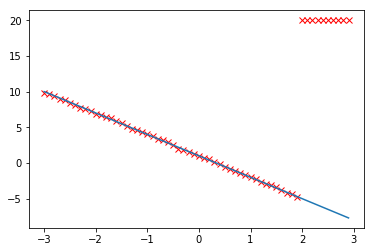

In [4]:
# Plot the training data points

plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr')
plt.plot(train_data.x.numpy(), train_data.f.numpy())
plt.show()

<!--Empty Space for separating topics-->

<h2 id="LR_Loader_Cost">Create a Linear Regression Class, Object, Data Loader, Criterion Function</h2>

Create linear regression model class.

In [5]:
# Create linear regression model class

from torch import nn

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Predition
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

Create the model object 

In [6]:
# Create the model object

model = linear_regression(1, 1)

We create the optimizer, the criterion function and a Data Loader object.

In [7]:
# Create optimizer, cost function and data loader object

optimizer = optim.SGD(model.parameters(), lr = 0.1)
criterion = nn.MSELoss()
trainloader = DataLoader(dataset = train_data, batch_size = 1)

<!--Empty Space for separating topics-->

<h2 id="Stop">Early Stopping and Saving the Mode</h2>

Run several epochs of gradient descent and save the model that performs best on the validation data.

In [8]:
# Train the model

LOSS_TRAIN = []
LOSS_VAL = []
n=1;
min_loss = 1000

def train_model_early_stopping(epochs, min_loss):
    for epoch in range(epochs):
        for x, y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train = criterion(model(train_data.x), train_data.y).data
            loss_val = criterion(model(val_data.x), val_data.y).data
            LOSS_TRAIN.append(loss_train)
            LOSS_VAL.append(loss_val)
            if loss_val < min_loss:
                value = epoch
                min_loss = loss_val
                torch.save(model.state_dict(), 'best_model.pt')

train_model_early_stopping(20, min_loss)

<!--Empty Space for separating topics-->

<h2 id="Result">View Results</h2>

View the  loss for every iteration on the training set and validation set.

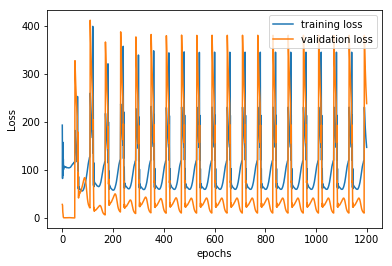

In [9]:
# Plot the loss

plt.plot(LOSS_TRAIN, label = 'training loss')
plt.plot(LOSS_VAL, label = 'validation loss')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(loc = 'upper right')
plt.show()

We will create a new linear regression object; we will use the parameters saved in the early stopping. The model must be the same input dimension and output dimension as the original model.

In [10]:
# Create a new linear regression model object

model_best = linear_regression(1, 1)

Load the model parameters <code>torch.load()</code>, then assign them to the object <code>model_best</code> using the method <code>load_state_dict</code>. 

In [11]:
# Assign the best model to model_best

model_best.load_state_dict(torch.load('best_model.pt'))

Let's compare the prediction  from the model obtained using early stopping and the model derived from  using the maximum number of iterations.

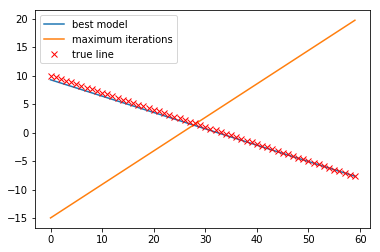

In [12]:
plt.plot(model_best(val_data.x).data.numpy(), label = 'best model')
plt.plot(model(val_data.x).data.numpy(), label = 'maximum iterations')
plt.plot(val_data.y.numpy(), 'rx', label = 'true line')
plt.legend()
plt.show()

We can see the model obtained via  early stopping fits the data points much better. For more variations of early stopping see:


Prechelt, Lutz.<i> "Early stopping-but when?." Neural Networks: Tricks of the trade. Springer, Berlin, Heidelberg, 1998. 55-69</i>.

<!--Empty Space for separating topics-->

<a href="http://cocl.us/pytorch_link_bottom">
    <img src="https://cocl.us/pytorch_image_bottom" width="750" alt="PyTorch Bottom" />
</a>

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>

<hr>

Copyright &copy; 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.